<a href="https://colab.research.google.com/github/Amilcar28/Amilcar28/blob/main/projeto_SPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import xarray as xr
import cdsapi
from scipy.interpolate import griddata
import spei
import spi
import salem
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import geopandas as gpd
import pandas as pd
import netCDF4
import rioxarray  # Necessário para habilitar o método .rio
#from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
from climate_indices import indices
#ncfile = 'dados_iag/interpolated_wind.nc'
#print(ncfile)
#data = Dataset(ncfile)

ModuleNotFoundError: No module named 'cdsapi'

In [4]:
!pip install xarray
!pip install salem
!pip install matplotlib
!pip install cartopy
!pip install numpy
!pip install geopandas
!pip install pandas
!pip installnetCDF4
!pip install spi
!pip install scipy
!pip install climate-indices xarray
!pip install spei
!pip install spi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 16.4 MB/s eta 0:00:00
ERROR: unknown command "installnetCDF4" - maybe you meant "install"
  Preparing metadata (setup.py) ... done
  Created wheel for spi: filename=spi-0.2.0-py3-none-any.whl size=5767 sha256=f4028f24e95ac2a0bf9e101992cc698746e7c4df408756ffe6775ab5e3f87bfc
  Stored in directory: /root/.cache/pip/wheels/3f/ad/25/89cd2e37fa6db2adfa2cfdb5a4d31dcb44df980ed22805df50
Successfully built spi
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1

In [5]:
import numpy as np
import pandas as pd
import xarray as xr
import scipy.stats as stats
import spei
import spi
import xarray as xr
from scipy.interpolate import griddata
import salem
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import geopandas as gpd
import pandas as pd
import netCDF4
import scipy
import climate_indices
import scipy.stats as stats
from climate_indices import compute

In [6]:
# Acessar os arquivos do Drive do gmail pelo colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
ds_pr = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_chirps.nc")['precip']
ds_pr

<xarray.DataArray 'precip' (time: 492, lat: 100, lon: 260)> Size: 51MB
[12792000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2022-12-01
  * lat      (lat) float32 400B -17.98 -17.92 -17.88 ... -13.12 -13.08 -13.03
  * lon      (lon) float32 1kB 11.02 11.07 11.12 11.18 ... 23.88 23.93 23.97
Attributes:
    colorBarMaximum:  400.0
    colorBarMinimum:  0.0
    ioos_category:    Meteorology
    long_name:        Precipitation
    standard_name:    lwe_precipitation_rate
    time_step:        month
    units:            mm/month

In [10]:
ds_pet = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_pet_era5_land2.nc")['pev']
ds_pet

<xarray.DataArray 'pev' (time: 492, lat: 50, lon: 129)> Size: 13MB
[3173400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2022-12-01
  * lon      (lon) float64 1kB 11.1 11.2 11.3 11.4 11.5 ... 23.6 23.7 23.8 23.9
  * lat      (lat) float64 400B -13.1 -13.2 -13.3 -13.4 ... -17.8 -17.9 -18.0
    number   int64 8B ...
    expver   (time) <U4 8kB ...
Attributes: (12/32)
    GRIB_paramId:                             228251
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      21291
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgas
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Potential evaporation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [15]:
import xarray as xr
import numpy as np
from scipy.stats import gamma, norm
from scipy.interpolate import griddata

# Carregar os datasets
ds_pr = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_chirps.nc")['precip']
ds_pet = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_pet_era5_land2.nc")['pev']

# Define new lat/lon coordinates to be the same as ds_pr
new_lat = ds_pr['lat']
new_lon = ds_pr['lon']

# Function to interpolate ds_pet to match ds_pr grid
def interpolate_pet(ds_pet, new_lat, new_lon):

    # Create a grid of target coordinates
    new_lon_2d, new_lat_2d = np.meshgrid(new_lon, new_lat)

    interpolated_data = []
    for t in range(len(ds_pet['time'])):

        # Get lat and lon for ds_pet
        pet_lat = ds_pet['lat'].values
        pet_lon = ds_pet['lon'].values

        # Create a grid for the old coordinates
        pet_lon_2d, pet_lat_2d = np.meshgrid(pet_lon, pet_lat)

        # Interpolate the 2D data
        interp_pet = griddata(
            (pet_lat_2d.flatten(), pet_lon_2d.flatten()),
            ds_pet.isel(time=t).values.flatten(),
            (new_lat_2d, new_lon_2d),
            method='linear'
        )
        interpolated_data.append(interp_pet)

    # Create a new xarray DataArray with the interpolated values
    interpolated_pet = xr.DataArray(
        np.stack(interpolated_data),
        coords={'time': ds_pet['time'], 'lat': new_lat, 'lon': new_lon},
        dims=['time', 'lat', 'lon']
    )
    return interpolated_pet

# Interpolate ds_pet to the grid of ds_pr
ds_pet_interp = interpolate_pet(ds_pet, new_lat, new_lon)

# Calcular o SPEI
spei_data = ds_pr - ds_pet_interp

# Função para calcular o SPI (normalização da precipitação)
def calculate_spi(precip, scale): #Changed ds_pr to precip
    # Replace non-finite values with 0
    precip_filled = precip.fillna(0)
    # Ensure data is strictly positive for gamma fit
    precip_positive = precip_filled + 1e-9 # Add a small constant
    # Ajustar uma distribuição gamma à precipitação
    shape, loc, scale = gamma.fit(precip_positive.values.flatten(), floc=0) #Fatten precip
    # Calcular a probabilidade acumulada
    cdf = gamma.cdf(precip.values, shape, loc=loc, scale=scale) #Pass precip.values to cdf
    # Transformar para a distribuição normal padrão
    spi = norm.ppf(cdf)
    return xr.DataArray(spi, coords=precip.coords, dims=precip.dims) #Return with coords

# Função para calcular o SPEI (normalização de P - PET)
def calculate_spei(spei_data, scale):
    # Ajustar uma distribuição normal ou gamma à diferença P - PET
    # Aqui usamos uma distribuição normal como exemplo
    mean = spei_data.mean(dim='time')
    std = spei_data.std(dim='time')
    spei = (spei_data - mean) / std
    return spei

# Calcular SPI e SPEI para uma escala de tempo (ex: 3 meses)
scale = 3  # Escala de tempo em meses
spi = calculate_spi(ds_pr.rolling(time=scale).sum(), scale)
spei = calculate_spei(spei_data.rolling(time=scale).sum(), scale)

# Salvar os resultados
spi.to_netcdf('spi.nc')
spei.to_netcdf('spei.nc')

FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'gamma' requires that 0 < (x - loc)/scale  < inf for each x in `data`.

In [16]:
import xarray as xr
import numpy as np
from scipy.stats import gamma, norm
from scipy.interpolate import griddata

# Carregar os datasets
ds_pr = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_chirps.nc")['precip']
ds_pet = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_pet_era5_land2.nc")['pev']

# Define new lat/lon coordinates to be the same as ds_pr
new_lat = ds_pr['lat']
new_lon = ds_pr['lon']

# Function to interpolate ds_pet to match ds_pr grid
def interpolate_pet(ds_pet, new_lat, new_lon):

    # Create a grid of target coordinates
    new_lon_2d, new_lat_2d = np.meshgrid(new_lon, new_lat)

    interpolated_data = []
    for t in range(len(ds_pet['time'])):

        # Get lat and lon for ds_pet
        pet_lat = ds_pet['lat'].values
        pet_lon = ds_pet['lon'].values

        # Create a grid for the old coordinates
        pet_lon_2d, pet_lat_2d = np.meshgrid(pet_lon, pet_lat)

        # Interpolate the 2D data
        interp_pet = griddata(
            (pet_lat_2d.flatten(), pet_lon_2d.flatten()),
            ds_pet.isel(time=t).values.flatten(),
            (new_lat_2d, new_lon_2d),
            method='linear'
        )
        interpolated_data.append(interp_pet)

    # Create a new xarray DataArray with the interpolated values
    interpolated_pet = xr.DataArray(
        np.stack(interpolated_data),
        coords={'time': ds_pet['time'], 'lat': new_lat, 'lon': new_lon},
        dims=['time', 'lat', 'lon']
    )
    return interpolated_pet

# Interpolate ds_pet to the grid of ds_pr
ds_pet_interp = interpolate_pet(ds_pet, new_lat, new_lon)

# Calcular o SPEI
spei_data = ds_pr - ds_pet_interp

# Função para calcular o SPI (normalização da precipitação)
def calculate_spi(precip, scale): #Changed ds_pr to precip
    # Replace non-finite values with 0
    precip_filled = precip.fillna(0)
    # Ensure data is strictly positive for gamma fit
    precip_positive = precip_filled.where(precip_filled > 0, 1e-9) # Replace non-positive values with a small constant
    # Ajustar uma distribuição gamma à precipitação
    shape, loc, scale = gamma.fit(precip_positive.values.flatten(), floc=0) #Fatten precip
    # Calcular a probabilidade acumulada
    cdf = gamma.cdf(precip, shape, loc=loc, scale=scale) #Pass precip to cdf to preserve coordinates
    # Transformar para a distribuição normal padrão
    spi = norm.ppf(cdf)
    return xr.DataArray(spi, coords=precip.coords, dims=precip.dims) #Return with coords

# Função para calcular o SPEI (normalização de P - PET)
def calculate_spei(spei_data, scale):
    # Ajustar uma distribuição normal ou gamma à diferença P - PET
    # Aqui usamos uma distribuição normal como exemplo
    mean = spei_data.mean(dim='time')
    std = spei_data.std(dim='time')
    spei = (spei_data - mean) / std
    return spei

# Calcular SPI e SPEI para uma escala de tempo (ex: 3 meses)
scale = 3  # Escala de tempo em meses
spi = calculate_spi(ds_pr.rolling(time=scale).sum(), scale)
spei = calculate_spei(spei_data.rolling(time=scale).sum(), scale)

# Salvar os resultados
spi.to_netcdf('spi.nc')
spei.to_netcdf('spei.nc')

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


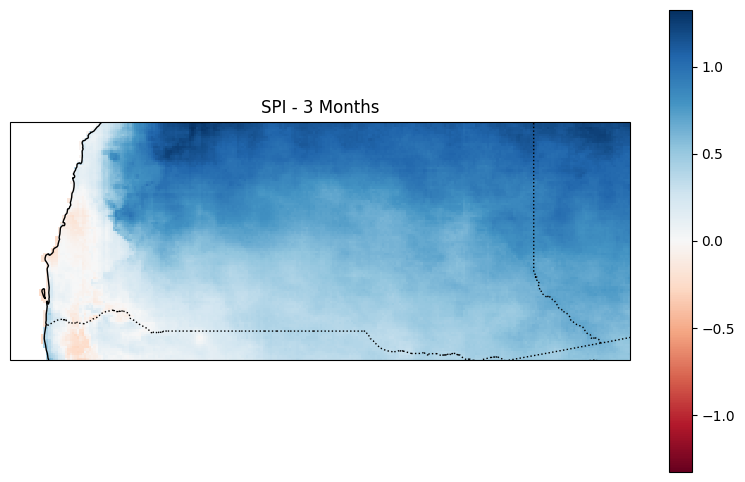

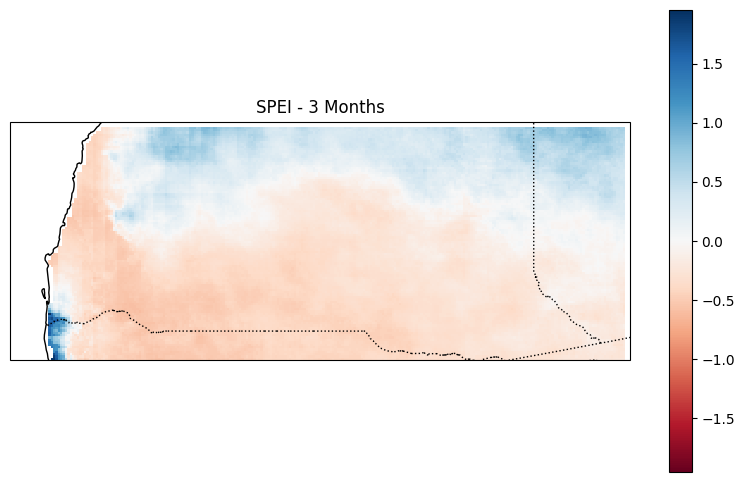

In [17]:
# Plotting function
def plot_indices(data_array, title, time_slice):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Use pcolormesh for plotting
    im = data_array.isel(time=time_slice).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu', add_colorbar=True)

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(title)

    plt.show()

# Plot SPI and SPEI for a specific time slice (e.g., the last time step)
time_slice = -1  # Use -1 to get the last time slice

plot_indices(spi, f'SPI - {scale} Months', time_slice)
plot_indices(spei, f'SPEI - {scale} Months', time_slice)

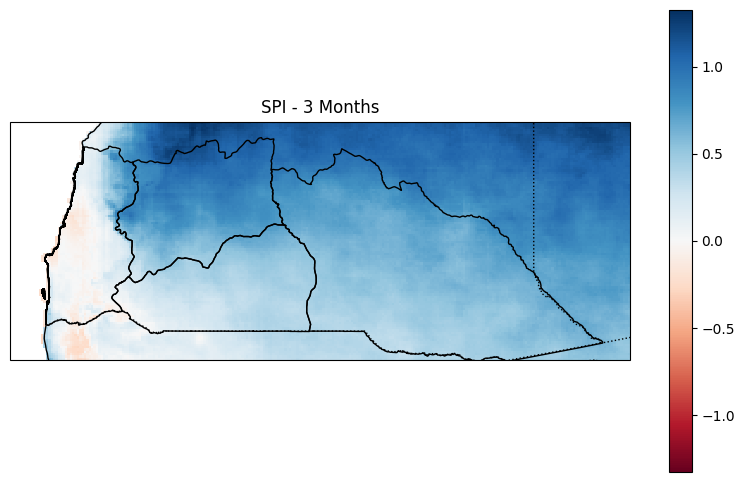

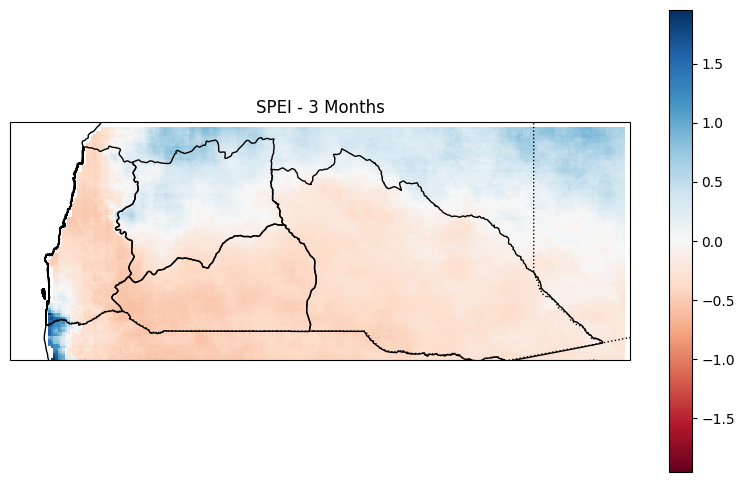

In [19]:
# Plotting function
def plot_indices(data_array, title, time_slice, shp_path=None): #shp_path argument added
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Use pcolormesh for plotting
    im = data_array.isel(time=time_slice).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu', add_colorbar=True)

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Add shapefile if path is provided
    if shp_path:
        try:
            # Use geopandas to read the shapefile and get geometries
            gdf = gpd.read_file(shp_path)
            ax.add_geometries(gdf.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black') #Added geometries to plot
        except Exception as e:
            print(f"Error loading shapefile: {e}")

    ax.set_title(title)

    plt.show()

# Plot SPI and SPEI for a specific time slice (e.g., the last time step)
time_slice = -1  # Use -1 to get the last time slice
shp_path = "/content/drive/MyDrive/Data_pesquisa/SIG_angola/sul_angola.shp"  # Replace with your shapefile path

plot_indices(spi, f'SPI - {scale} Months', time_slice, shp_path)
plot_indices(spei, f'SPEI - {scale} Months', time_slice, shp_path)


#SPEI 6

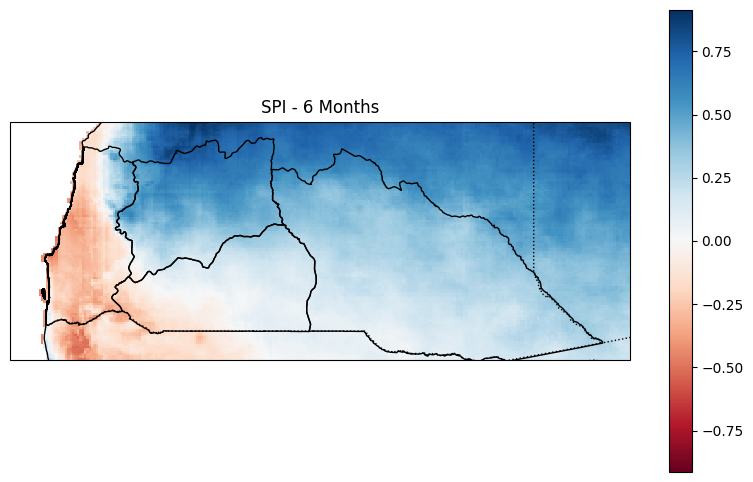

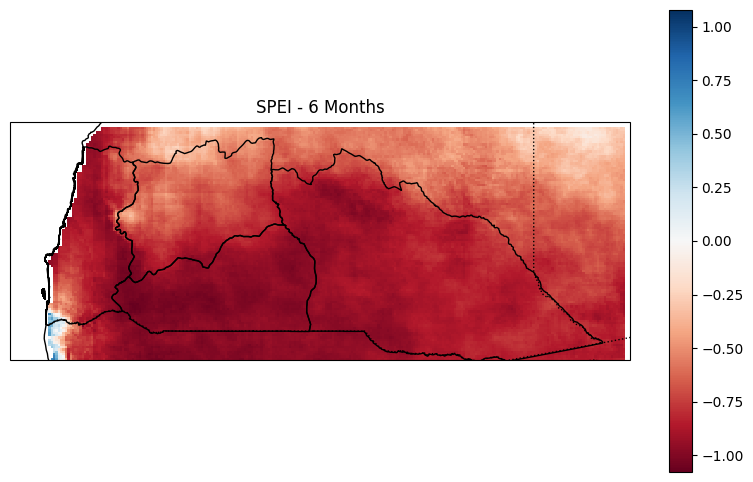

In [20]:
import xarray as xr
import numpy as np
from scipy.stats import gamma, norm
from scipy.interpolate import griddata

# Carregar os datasets
ds_pr = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_chirps.nc")['precip']
ds_pet = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_pet_era5_land2.nc")['pev']

# Define new lat/lon coordinates to be the same as ds_pr
new_lat = ds_pr['lat']
new_lon = ds_pr['lon']

# Function to interpolate ds_pet to match ds_pr grid
def interpolate_pet(ds_pet, new_lat, new_lon):

    # Create a grid of target coordinates
    new_lon_2d, new_lat_2d = np.meshgrid(new_lon, new_lat)

    interpolated_data = []
    for t in range(len(ds_pet['time'])):

        # Get lat and lon for ds_pet
        pet_lat = ds_pet['lat'].values
        pet_lon = ds_pet['lon'].values

        # Create a grid for the old coordinates
        pet_lon_2d, pet_lat_2d = np.meshgrid(pet_lon, pet_lat)

        # Interpolate the 2D data
        interp_pet = griddata(
            (pet_lat_2d.flatten(), pet_lon_2d.flatten()),
            ds_pet.isel(time=t).values.flatten(),
            (new_lat_2d, new_lon_2d),
            method='linear'
        )
        interpolated_data.append(interp_pet)

    # Create a new xarray DataArray with the interpolated values
    interpolated_pet = xr.DataArray(
        np.stack(interpolated_data),
        coords={'time': ds_pet['time'], 'lat': new_lat, 'lon': new_lon},
        dims=['time', 'lat', 'lon']
    )
    return interpolated_pet

# Interpolate ds_pet to the grid of ds_pr
ds_pet_interp = interpolate_pet(ds_pet, new_lat, new_lon)

# Calcular o SPEI
spei_data = ds_pr - ds_pet_interp

# Função para calcular o SPI (normalização da precipitação)
def calculate_spi(precip, scale): #Changed ds_pr to precip
    # Replace non-finite values with 0
    precip_filled = precip.fillna(0)
    # Ensure data is strictly positive for gamma fit
    precip_positive = precip_filled.where(precip_filled > 0, 1e-9) # Replace non-positive values with a small constant
    # Ajustar uma distribuição gamma à precipitação
    shape, loc, scale = gamma.fit(precip_positive.values.flatten(), floc=0) #Fatten precip
    # Calcular a probabilidade acumulada
    cdf = gamma.cdf(precip, shape, loc=loc, scale=scale) #Pass precip to cdf to preserve coordinates
    # Transformar para a distribuição normal padrão
    spi = norm.ppf(cdf)
    return xr.DataArray(spi, coords=precip.coords, dims=precip.dims) #Return with coords

# Função para calcular o SPEI (normalização de P - PET)
def calculate_spei(spei_data, scale):
    # Ajustar uma distribuição normal ou gamma à diferença P - PET
    # Aqui usamos uma distribuição normal como exemplo
    mean = spei_data.mean(dim='time')
    std = spei_data.std(dim='time')
    spei = (spei_data - mean) / std
    return spei

# Calcular SPI e SPEI para uma escala de tempo (ex: 3 meses)
scale = 6  # Escala de tempo em meses
spi = calculate_spi(ds_pr.rolling(time=scale).sum(), scale)
spei = calculate_spei(spei_data.rolling(time=scale).sum(), scale)

# Salvar os resultados
spi.to_netcdf('spi_6.nc')
spei.to_netcdf('spei_6.nc')


# Plotting function
def plot_indices(data_array, title, time_slice, shp_path=None): #shp_path argument added
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Use pcolormesh for plotting
    im = data_array.isel(time=time_slice).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu', add_colorbar=True)

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Add shapefile if path is provided
    if shp_path:
        try:
            # Use geopandas to read the shapefile and get geometries
            gdf = gpd.read_file(shp_path)
            ax.add_geometries(gdf.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black') #Added geometries to plot
        except Exception as e:
            print(f"Error loading shapefile: {e}")

    ax.set_title(title)

    plt.show()

# Plot SPI and SPEI for a specific time slice (e.g., the last time step)
time_slice = -1  # Use -1 to get the last time slice
shp_path = "/content/drive/MyDrive/Data_pesquisa/SIG_angola/sul_angola.shp"  # Updated shapefile path

plot_indices(spi, f'SPI - {scale} Months', time_slice, shp_path)
plot_indices(spei, f'SPEI - {scale} Months', time_slice, shp_path)

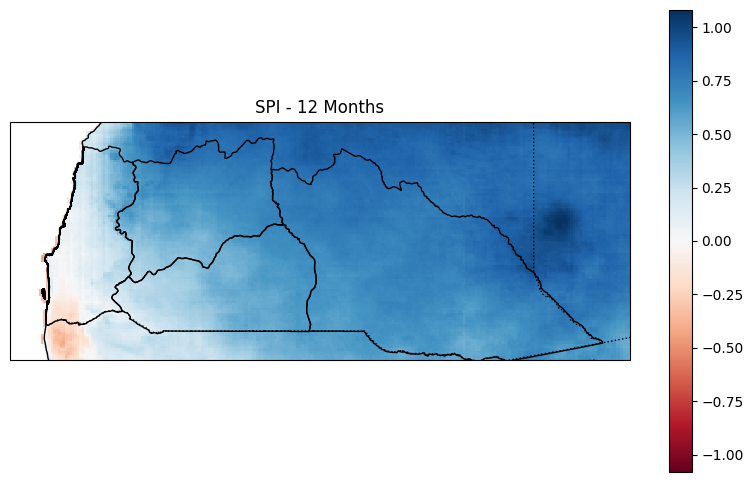

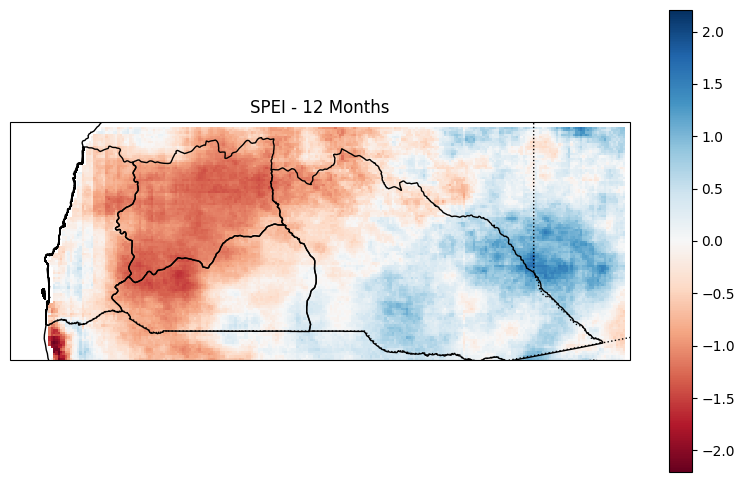

In [21]:
import xarray as xr
import numpy as np
from scipy.stats import gamma, norm
from scipy.interpolate import griddata

# Carregar os datasets
ds_pr = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_chirps.nc")['precip']
ds_pet = xr.open_dataset("/content/drive/MyDrive/Data_pesquisa/sul_pet_era5_land2.nc")['pev']

# Define new lat/lon coordinates to be the same as ds_pr
new_lat = ds_pr['lat']
new_lon = ds_pr['lon']

# Function to interpolate ds_pet to match ds_pr grid
def interpolate_pet(ds_pet, new_lat, new_lon):

    # Create a grid of target coordinates
    new_lon_2d, new_lat_2d = np.meshgrid(new_lon, new_lat)

    interpolated_data = []
    for t in range(len(ds_pet['time'])):

        # Get lat and lon for ds_pet
        pet_lat = ds_pet['lat'].values
        pet_lon = ds_pet['lon'].values

        # Create a grid for the old coordinates
        pet_lon_2d, pet_lat_2d = np.meshgrid(pet_lon, pet_lat)

        # Interpolate the 2D data
        interp_pet = griddata(
            (pet_lat_2d.flatten(), pet_lon_2d.flatten()),
            ds_pet.isel(time=t).values.flatten(),
            (new_lat_2d, new_lon_2d),
            method='linear'
        )
        interpolated_data.append(interp_pet)

    # Create a new xarray DataArray with the interpolated values
    interpolated_pet = xr.DataArray(
        np.stack(interpolated_data),
        coords={'time': ds_pet['time'], 'lat': new_lat, 'lon': new_lon},
        dims=['time', 'lat', 'lon']
    )
    return interpolated_pet

# Interpolate ds_pet to the grid of ds_pr
ds_pet_interp = interpolate_pet(ds_pet, new_lat, new_lon)

# Calcular o SPEI
spei_data = ds_pr - ds_pet_interp

# Função para calcular o SPI (normalização da precipitação)
def calculate_spi(precip, scale): #Changed ds_pr to precip
    # Replace non-finite values with 0
    precip_filled = precip.fillna(0)
    # Ensure data is strictly positive for gamma fit
    precip_positive = precip_filled.where(precip_filled > 0, 1e-9) # Replace non-positive values with a small constant
    # Ajustar uma distribuição gamma à precipitação
    shape, loc, scale = gamma.fit(precip_positive.values.flatten(), floc=0) #Fatten precip
    # Calcular a probabilidade acumulada
    cdf = gamma.cdf(precip, shape, loc=loc, scale=scale) #Pass precip to cdf to preserve coordinates
    # Transformar para a distribuição normal padrão
    spi = norm.ppf(cdf)
    return xr.DataArray(spi, coords=precip.coords, dims=precip.dims) #Return with coords

# Função para calcular o SPEI (normalização de P - PET)
def calculate_spei(spei_data, scale):
    # Ajustar uma distribuição normal ou gamma à diferença P - PET
    # Aqui usamos uma distribuição normal como exemplo
    mean = spei_data.mean(dim='time')
    std = spei_data.std(dim='time')
    spei = (spei_data - mean) / std
    return spei

# Calcular SPI e SPEI para uma escala de tempo (ex: 3 meses)
scale = 12  # Escala de tempo em meses
spi = calculate_spi(ds_pr.rolling(time=scale).sum(), scale)
spei = calculate_spei(spei_data.rolling(time=scale).sum(), scale)

# Salvar os resultados
spi.to_netcdf('spi_12.nc')
spei.to_netcdf('spei_12.nc')


# Plotting function
def plot_indices(data_array, title, time_slice, shp_path=None): #shp_path argument added
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Use pcolormesh for plotting
    im = data_array.isel(time=time_slice).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu', add_colorbar=True)

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Add shapefile if path is provided
    if shp_path:
        try:
            # Use geopandas to read the shapefile and get geometries
            gdf = gpd.read_file(shp_path)
            ax.add_geometries(gdf.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black') #Added geometries to plot
        except Exception as e:
            print(f"Error loading shapefile: {e}")

    ax.set_title(title)

    plt.show()

# Plot SPI and SPEI for a specific time slice (e.g., the last time step)
time_slice = -1  # Use -1 to get the last time slice
shp_path = "/content/drive/MyDrive/Data_pesquisa/SIG_angola/sul_angola.shp"  # Updated shapefile path

plot_indices(spi, f'SPI - {scale} Months', time_slice, shp_path)
plot_indices(spei, f'SPEI - {scale} Months', time_slice, shp_path)